In [1]:
#DATA CLEANING


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('downloads/DataScientist.csv')
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [3]:
df.duplicated() #Check for any duplicate data

0       False
1       False
2       False
3       False
4       False
        ...  
3904    False
3905    False
3906    False
3907    False
3908    False
Length: 3909, dtype: bool

In [4]:
#Deletes any duplicated data
df.drop_duplicates(inplace =True, keep='last') 

In [5]:
#Changes style of column names so that each first letter in separate words is a capital letter
df.columns=df.columns.str.title() 
df.head() 

,Unnamed: 0,Index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type Of Ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [6]:
#Deletes unnecessary columns

del df['Unnamed: 0']
del df['Index']


In [7]:
df.columns #View column names

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type Of Ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [8]:
df['Job Title'].unique()

array(['Senior Data Scientist', 'Data Scientist, Product Analytics',
       'Data Science Manager', ..., 'Cyber Security Data Engineer',
       'Security Analytics Data Engineer',
       'Patient Safety Physician or Safety Scientist - UK, Europe or the US'],
      dtype=object)

In [9]:
df['Job Title'].unique() #Lists unique values of specified column
df['Job Title'] = df['Job Title'].str.split('-',expand=True)
df['Job Title']

0                               Senior Data Scientist
1                   Data Scientist, Product Analytics
2                                Data Science Manager
3                                        Data Analyst
4                              Director, Data Science
                            ...                      
3904                                AWS Data Engineer
3905                            Data Analyst â Junior
3906                 Security Analytics Data Engineer
3907                 Security Analytics Data Engineer
3908    Patient Safety Physician or Safety Scientist 
Name: Job Title, Length: 3909, dtype: object

In [10]:
df['Salary Estimate']= df['Salary Estimate'].str.replace('Glassdoor est.', '').str.replace('Employer est.', '')
df['Salary Estimate']= df['Salary Estimate'].str.replace('(','').str.replace(')','')

df_Salary = df['Salary Estimate'].str.split('-',expand=True)

MIN_Salary = df_Salary[0].str.replace('$','').str.replace('K','000')

MAX_Salary = df_Salary[1].str.replace('$','').str.replace('K','000')



In [11]:
np.where(MAX_Salary=='53 Per Hour') #Result shows index of values: (array([685, 686, 687, 688, 689, 690, 691]),))

(array([685, 686, 687, 688, 689, 690, 691]),)

In [12]:
MIN_Salary[691] #Shows values in the MIN_Salary Array with the same index
#All at same index return $34.

'34'

In [13]:
MAX_Salary = MAX_Salary.replace('53 Per Hour', '93121')
MAX_Salary = MAX_Salary.replace('26 Per Hour','45682')
MAX_Salary = MAX_Salary.replace('27 Per Hour', '47439')

MIN_Salary = MIN_Salary.replace('34', '59738')
MIN_Salary = MIN_Salary.replace('10', '17570')
MIN_Salary = MIN_Salary.replace('17', '29869')

MAX_Salary=MAX_Salary.astype(float)
MIN_Salary=MIN_Salary.astype(float)

   
df['Minimum Salary'] = MIN_Salary
df['Maximum Salary'] = MAX_Salary


MID_Salary = np.mean(np.array([MIN_Salary, MAX_Salary]), axis=0 )


df['Salary: Middle of Range'] = MID_Salary


In [14]:
df['Rating'].unique()

RatingMean = df['Rating'].astype(float).mean()
df['Rating'].replace(-1, RatingMean)

0       3.500000
1       4.500000
2       3.283576
3       3.400000
4       3.400000
          ...   
3904    4.400000
3905    5.000000
3906    3.800000
3907    4.000000
3908    3.700000
Name: Rating, Length: 3909, dtype: float64

In [15]:
df_CompanyName = df['Company Name'].str.split('\n', expand = True)
df['Company Name'] = df_CompanyName[0]



In [16]:
df['Location'].unique()
df_Location = df['Location'].str.split(',',expand=True)

City = df_Location[0]

State = df_Location[1]


df['Location: City'] = City
df['Location: State']= State   



In [17]:
df['Headquarters'].unique()
df_HQ = df['Headquarters'].str.split(",",expand=True)

HQCity = df_HQ[0]

HQState = df_HQ[1]


df['Headquarters: City'] = HQCity
df['Headquarters: State']= HQState  

In [18]:
df_Size = df['Size'].replace([-1,'-1'], 0.123).str.replace('-','to').str.replace('+', '')
df_Size = df_Size.replace('Unknown', 0.123).str.replace(' ','').str.replace('employees', '')
df_Size = df_Size.fillna(0.123).str.split('to',expand=True)
MIN_Size = df_Size[0]
MAX_Size = df_Size[1]

MIN_Size=df_Size[0]
MIN_Size = MIN_Size.astype(float)

MAX_Size = df_Size[1]
MAX_Size = MAX_Size.astype(float)



df['Size: Minimum of Range'] = MIN_Size.astype(float)
MinSizeMean = df['Size: Minimum of Range'].mean()
df['Size: Minimum of Range']=df['Size: Minimum of Range'].replace(0.123, MinSizeMean)


df['Size: Maximum of Range'] = MAX_Size.astype(float)
MaxSizeMean = df['Size: Maximum of Range'].mean()
df['Size: Maximum of Range']=df['Size: Maximum of Range'].replace(0.123, MaxSizeMean)



MID_Size=np.mean(np.array([MIN_Size, MAX_Size]), axis=0 )
df['Size: Middle of Range'] = MID_Size


In [19]:
df['Founded'].unique() 
df['Founded']= df['Founded'].replace([-1,'-1'], 'Unknown')


In [20]:
df['Type Of Ownership'].unique()
df['Type Of Ownership']= df['Type Of Ownership'].str.replace('Company - ', '').str.replace(' or ', ' / ')
df['Type Of Ownership']=df['Type Of Ownership'].replace('-1','Unknown')

In [21]:
df['Industry'].unique() 
df['Industry']=df['Industry'].replace([-1,'-1'], 'Unknown')

In [22]:
df['Sector'].unique()
df['Sector'] = df['Sector'].replace([-1,'-1'], 'Unknown')

In [23]:
df['Revenue'].unique()
df['Revenue'] = df['Revenue'].fillna(0.123)
df['Revenue'] = df['Revenue'].replace(['Unknown / Non-Applicable'], 0.123).replace('Unknown', 0.123)
df['Revenue'] = df['Revenue'].replace([-1,'-1'], 0.123).str.replace(' ','')
df['Revenue'] = df['Revenue'].replace('Lessthan1', 0.123)
df['Revenue'] = df['Revenue'].str.replace('USD', '').str.replace('$','').str.replace('(','').str.replace(')','')
df['Revenue'] = df['Revenue'].str.replace('million', '').str.replace('billion','000')
df['Revenue'] = df['Revenue'].str.replace('10+', '10000to11000').str.replace('+','')

Revenue = df['Revenue'].str.split('to',expand=True)

MIN_Revenue = Revenue[0].fillna(0.123).replace('Lessthan1', 0.123)
MIN_Revenue=MIN_Revenue.astype(int)
MinMean = MIN_Revenue.mean()
df['Minimum Revenue']=MIN_Revenue.replace(0.123, MinMean)


MAX_Revenue = Revenue[1].fillna(0.123)
MAX_Revenue=MAX_Revenue.astype(int)
MaxMean = MAX_Revenue.mean()
df['Maximum Revenue']=MAX_Revenue.replace(0.123, MaxMean)

MID_Revenue=np.mean(np.array([df['Minimum Revenue'], df['Maximum Revenue']]), axis=0 )
df['Revenue: Middle of Range'] = MID_Revenue




In [24]:
df['Competitors'].unique()
df['Competitors'] = df['Competitors'].replace([-1,'-1'], 'Unknown')

In [25]:
df['Easy Apply'].unique()
df['Easy Apply'] = df['Easy Apply'].replace('-1', 'False')

In [26]:
df['Competitors'].unique() 
df['Competitors']= df['Competitors'].replace([-1,'-1'], 'Unknown')

In [27]:
df.head() #View before deleting unnecessary columns

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type Of Ownership,...,Location: City,Location: State,Headquarters: City,Headquarters: State,Size: Minimum of Range,Size: Maximum of Range,Size: Middle of Range,Minimum Revenue,Maximum Revenue,Revenue: Middle of Range
0,Senior Data Scientist,$111K-$181K,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Private,...,New York,NY,Montreal,Canada,501.0,1000.0,750.5,0,0,0.0
1,"Data Scientist, Product Analytics",$111K-$181K,"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008,Private,...,New York,NY,New York,NY,1001.0,5000.0,3000.5,0,0,0.0
2,Data Science Manager,$111K-$181K,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,Unknown,Unknown,...,New York,NY,New York,NY,1.0,50.0,25.5,0,0,0.0
3,Data Analyst,$111K-$181K,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Private,...,Lyndhurst,NJ,Lyndhurst,NJ,201.0,500.0,350.5,0,0,0.0
4,"Director, Data Science",$111K-$181K,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007,Private,...,New York,NY,New York,NY,51.0,200.0,125.5,0,0,0.0


In [28]:
del df['Salary Estimate']
del df['Size']
del df['Revenue']
del df['Headquarters']
del df['Location']

In [29]:
#DATA VISUALISATION
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Average Salary'}, xlabel='Salary ($/Year)', ylabel='Frequency'>

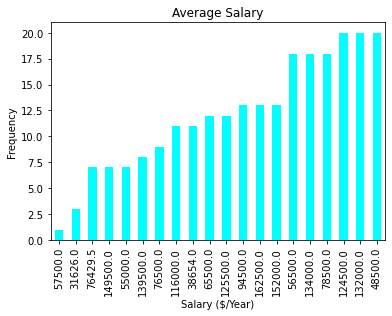

In [30]:
#Salary barchart

df['Salary: Middle of Range'].value_counts().sort_values(ascending=True).head(20).plot(
    kind='bar',
    color='cyan',
    title='Average Salary',
    ylabel='Frequency', 
    xlabel='Salary ($/Year)')


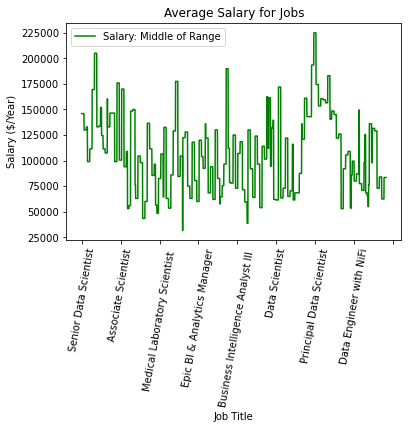

In [31]:
#Relationship Between Salary and Job Title

df[['Job Title','Salary: Middle of Range']].plot.line(x='Job Title',y='Salary: Middle of Range',color='green', rot = 80)
plt.title('Average Salary for Jobs')
plt.ylabel('Salary ($/Year)')
plt.xlabel('Job Title')
plt.show()

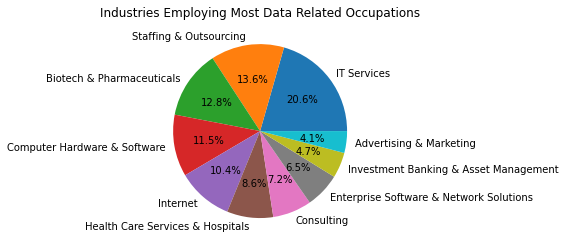

In [32]:
#Industries Piechart


df_Industry=df['Industry'].loc[df['Industry'] != 'Unknown'] 
#Deletes 'Unknown' value for the purpose of this chart creation

df_Industry.value_counts().sort_values(ascending=False).head(10).plot.pie(y='Industry',autopct='%0.1f%%')
plt.title('Industries Employing Most Data Related Occupations')
plt.axis('off')
plt.show()


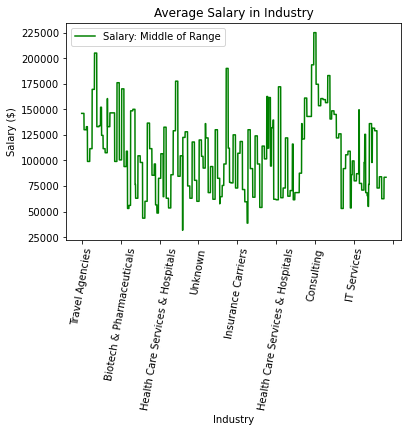

In [33]:
#Relationship between Salary and Industry

df[['Industry','Salary: Middle of Range']].plot.line(x='Industry',y='Salary: Middle of Range',color='green', rot = 80)
plt.title('Average Salary in Industry')
plt.xlabel('Industry')
plt.ylabel('Salary ($)')
plt.show()

<AxesSubplot:title={'center':'Most Common Industry'}, xlabel='Industry', ylabel='Frequency'>

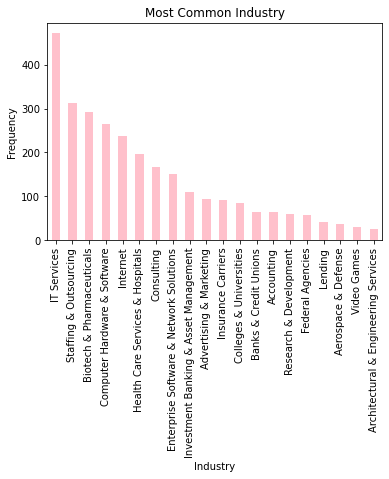

In [34]:
#Industry bar chart

df_Industry=df['Industry'].loc[df['Industry'] != 'Unknown'] 
#Deletes 'Unknown' value for the purpose of this chart creation

df_Industry.value_counts().sort_values(ascending=False).head(20).plot(
    kind='bar',
    color='pink',
    title='Most Common Industry',
    ylabel='Frequency', 
    xlabel='Industry')


<AxesSubplot:title={'center':'Year Founded'}, xlabel='Year', ylabel='Number of Companies'>

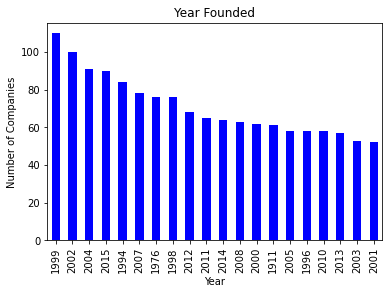

In [35]:
#Founded barchart

df_Founded=df['Founded'].loc[df['Founded'] != 'Unknown'] 
#Deletes 'Unknown' value for the purpose of this chart creation

df_Founded.value_counts().head(20).plot(
    kind = 'bar',
    color = 'blue',
    title = 'Year Founded',
    xlabel = 'Year',
    ylabel = 'Number of Companies')

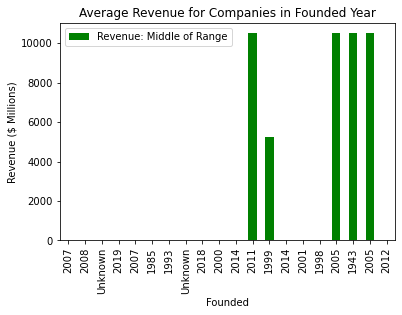

In [36]:
#Relationship between Revenue and Year Founded

df['Revenue: Middle of Range']=df['Revenue: Middle of Range'].loc[df['Revenue: Middle of Range'] != 'Unknown'] 
#Deletes 'Unknown' value for the purpose of this chart creation


df[['Revenue: Middle of Range', 'Founded']].head(20).plot.bar(x='Founded',y='Revenue: Middle of Range',color='green')
plt.title('Average Revenue for Companies in Founded Year')
plt.xlabel('Founded')
plt.ylabel('Revenue ($ Millions)')
plt.show()

<AxesSubplot:title={'center':'Frequency of Company Ownership'}, xlabel='Type of Ownership', ylabel='Frequency'>

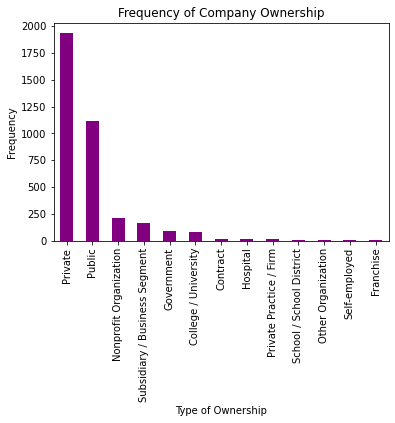

In [37]:
#Ownership bar chart

df_ToO=df['Type Of Ownership'].loc[df['Type Of Ownership'] != 'Unknown'] 
#Deletes 'Unknown' value for the purpose of this chart creation

df_ToO.value_counts().sort_values(ascending=False).head(20).plot(
    kind = 'bar',
    color = 'purple',
    title = 'Frequency of Company Ownership',
    xlabel = 'Type of Ownership',
    ylabel = 'Frequency')

<AxesSubplot:title={'center':'Data Occupations'}, xlabel='Job Title', ylabel='Frequency'>

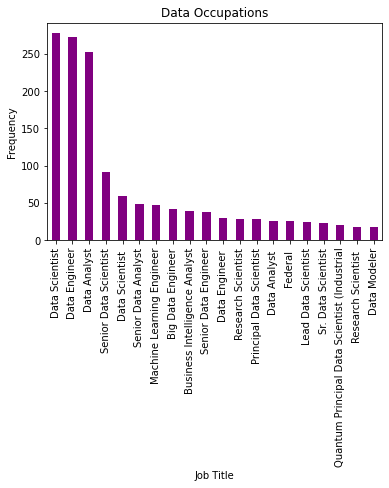

In [38]:
#Job title barchart

df['Job Title'].value_counts().sort_values(ascending=False).head(20).plot(
    kind = 'bar',
    color = 'purple',
    title = 'Data Occupations',
    xlabel = 'Job Title',
    ylabel = 'Frequency')

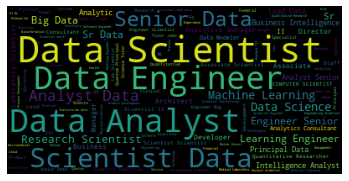

In [39]:
#Job Title WordCloud
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(df['Job Title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

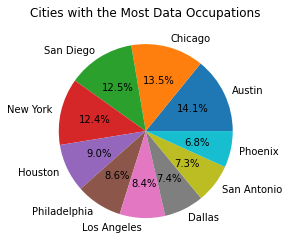

In [40]:
#Job Location Pie Chart

df['Location: City'].value_counts().sort_values(ascending=False).head(10).plot.pie(y='Headquarters',autopct='%0.1f%%')
plt.title('Cities with the Most Data Occupations')
plt.axis('off')
plt.show()

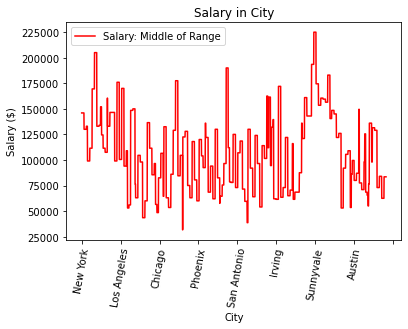

In [41]:
#City and Salary Relationship

df[['Salary: Middle of Range', 'Location: City']].plot.line(y='Salary: Middle of Range',x='Location: City',color='red', rot = 80)
plt.title('Salary in City')
plt.xlabel('City')
plt.ylabel('Salary ($)')
plt.show()

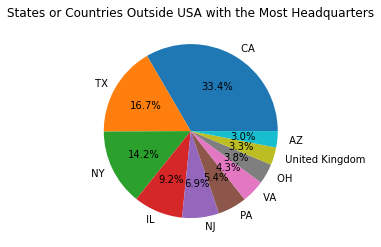

In [42]:
#Headquaters PieChart

df['Headquarters: State'].value_counts().sort_values(ascending=False).head(10).plot.pie(y='Headquarters',autopct="%0.1f%%")
plt.title('States or Countries Outside USA with the Most Headquarters')
plt.axis('off')
plt.show()

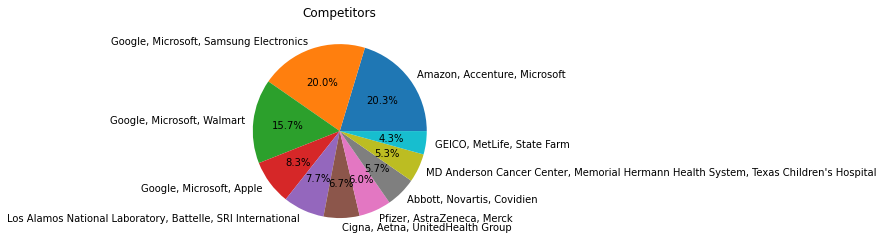

In [43]:
#Competitors

df['Competitors'].loc[df['Competitors']!='Unknown'].value_counts().sort_values(ascending=False).head(10).plot.pie(y='Competitors',autopct="%0.1f%%")
plt.title('Competitors')
plt.axis('off')
plt.show()

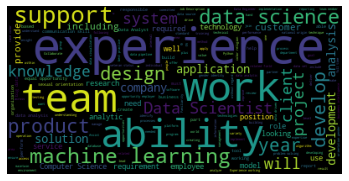

In [44]:
#Job Description Word Cloud

wordcloud = WordCloud().generate(' '.join(df['Job Description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:title={'center':'Size of Companies'}, xlabel='Size of Company', ylabel='Frequency'>

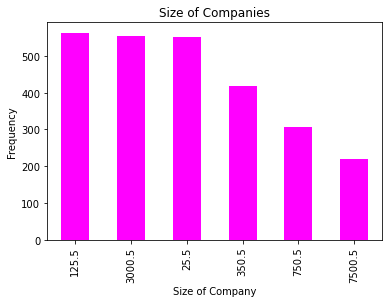

In [45]:
#Size

df['Size: Middle of Range'].value_counts().sort_values(ascending=False).head(20).plot(
    kind = 'bar',
    color = 'magenta',
    title = 'Size of Companies',
    xlabel = 'Size of Company',
    ylabel = 'Frequency')

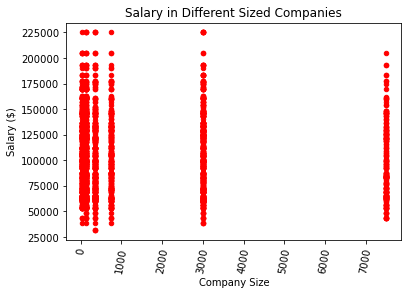

In [46]:
#Size of Company and Salary

df[['Salary: Middle of Range', 'Size: Middle of Range']].plot.scatter(x='Size: Middle of Range',y='Salary: Middle of Range',color='red', rot = 80)
plt.title('Salary in Different Sized Companies')
plt.ylabel('Salary ($)')
plt.xlabel('Company Size')
plt.show()

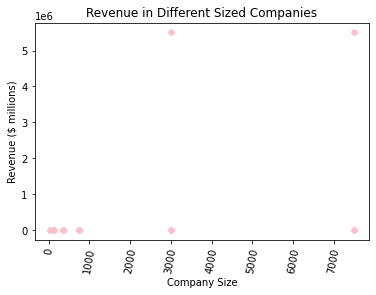

In [47]:
#Size of Company and Revenue

df[['Revenue: Middle of Range', 'Size: Middle of Range']].plot.scatter(x='Size: Middle of Range',y='Revenue: Middle of Range',color='pink', rot = 80)
plt.title('Revenue in Different Sized Companies')
plt.ylabel('Revenue ($ millions)')
plt.xlabel('Company Size')
plt.show()